# Assignment. Exploratory Data Analysis





In part 1 of this assignment, we will focus on exploratory data analysis of stock prices. Keep in mind, this assignment is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is challenging and you have to look things up on your own to try to solve the tasks issued. **
____
We'll focus on tech stocks and see how they progressed throughout the pandemic from the beginning of 2020 all the way to the end of Dec. 2020. You may look at other sectors as well in the end of this notebook, such as Airline companies and retail industry.

# Part 1


## Get the Data

In this section we will learn how to use pandas to directly read data from Yahoo finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**).*

### The Imports


In [1]:
#you need to install pandas datareader first. If you are using Canopy, you may comment out the first line. If you are using Anaconda, you may comment out the second line.
#!pip install pandas-datareader
#conda install -c anaconda pandas-datareader 
#!pip install --upgrade pandas
!pip install --upgrade pandas

import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb

import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following companies:
* Amazon
* Facebook
* Google
* Microsoft
* Twitter
* Apple


** Figure out how to get the stock data from Jan 1st 2020 to December 31st 2020 for each of these companies. Set each company to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each company.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/) for hints and instructions (it should just be a matter of replacing certain values. Use yahoo finance as a source, for example:**
    
    # Amazon
    Amazon = data.DataReader("AMZN", 'yahoo', start, end)

You may also use yfinance library explained in Method 2.

Thirdly, in case you want to use iex API, you may follow the steps here to register for an API token:https://algotrading101.com/learn/iex-api-guide/ 

The steps are basically:
1. register an account on https://iexcloud.io/console/
2. browse to the bottom, choose the "start free plan"
3. on the left you will see API_Tokens, and then generate your api tokens


# Method 1

In [2]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 12, 31)

In [3]:
# Amazon
AMZN = data.DataReader("AMZN", 'yahoo', start, end)

# Apple
AAPL = data.DataReader("AAPL", 'yahoo', start, end)

# Facebook
FB = data.DataReader("FB", 'yahoo', start, end)

# Google
GOOG = data.DataReader("GOOG", 'yahoo', start, end)

# Microsoft
MSFT = data.DataReader("MSFT", 'yahoo', start, end)

# Twitter
TWTR = data.DataReader("TWTR", 'yahoo', start, end)

In [ ]:
#AMZN.reset_index(inplace=True)
#AMZN["Date"].value_counts()
#AMZN.head()

# Method 2

In [4]:
!pip install yfinance
import yfinance as yfin
yfin.pdr_override()

In [ ]:
#AMZN = data.get_data_yahoo("AMZN", start=start, end=end)
#AMZN.head()

In [ ]:
# Could also do this for a Panel Object
#df = data.DataReader(['AMZN', 'FB', 'GOOG', 'MSFT', 'TWTR', 'AAPL'],'yahoo', start, end)
#df.head

##### Add a Column_Company Name (this is filled out for you)

In [5]:
AMZN["Company"]='Amazon'
AAPL["Company"]='Apple'
FB["Company"]='Facebook'
GOOG["Company"]='Google'
MSFT["Company"]='Microsoft'
TWTR["Company"]='Twitter'

##### Draw the closing prices of Amazon

Text(0, 0.5, 'Stock Price')

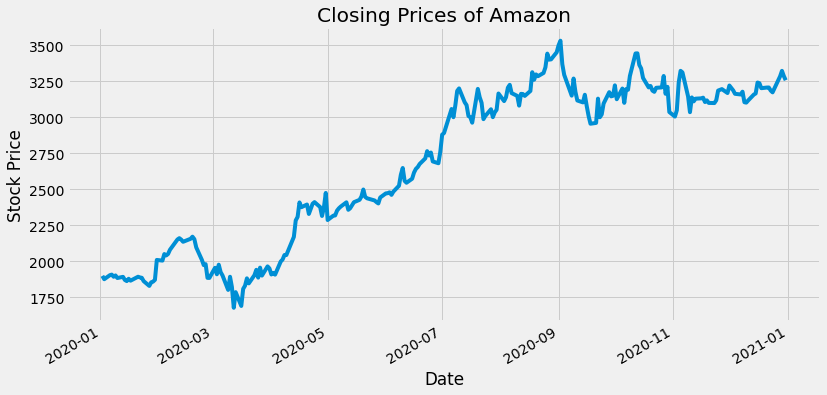

In [6]:
import matplotlib.pyplot as plt

# your code here
plt.style.use('fivethirtyeight')
plt.grid()
AMZN['Close'].plot(figsize=(12,6))
plt.title('Closing Prices of Amazon')
plt.ylabel('Stock Price')

##### Append all the data sets - these six tables

In [7]:
# your code here
merged_df=pd.concat([AMZN,AAPL,FB,GOOG,MSFT,TWTR])
merged_df

,High,Low,Open,Close,Volume,Adj Close,Company
Date,,,,,,,
2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000.0,1898.010010,Amazon
2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400.0,1874.969971,Amazon
2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800.0,1902.880005,Amazon
2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900.0,1906.859985,Amazon
2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000.0,1891.969971,Amazon
...,...,...,...,...,...,...,...
2020-12-24,55.189999,53.860001,54.520000,53.970001,3661100.0,53.970001,Twitter
2020-12-28,55.180000,53.930000,55.000000,54.430000,6829600.0,54.430000,Twitter
2020-12-29,55.400002,53.549999,54.509998,54.360001,6644800.0,54.360001,Twitter


##### Derive the average closing price for each company

In [8]:
# your code here
merged_AMZN=merged_df[(merged_df.Company=="Amazon")]
print("The average closing price for Amazon is $",round(merged_AMZN.Close.mean(),2))

merged_AAPL=merged_df[(merged_df.Company=="Apple")]
print("The average closing price for Apple is $",round(merged_AAPL.Close.mean(),2))

merged_FB=merged_df[(merged_df.Company=="Facebook")]
print("The average closing price for Facebook is $",round(merged_FB.Close.mean(),2))

merged_GOOG=merged_df[(merged_df.Company=="Google")]
print("The average closing price for Google is $",round(merged_GOOG.Close.mean(),2))

merged_MSFT=merged_df[(merged_df.Company=="Microsoft")]
print("The average closing price for Microsoft is $",round(merged_MSFT.Close.mean(),2))

merged_TWTR=merged_df[(merged_df.Company=="Twitter")]
print("The average closing price for Twitter is $",round(merged_TWTR.Close.mean(),2))

The average closing price for Amazon is $ 2680.86
The average closing price for Apple is $ 95.35
The average closing price for Facebook is $ 234.55
The average closing price for Google is $ 1481.4
The average closing price for Microsoft is $ 193.03
The average closing price for Twitter is $ 37.22


##### Plot the average closing price for each company using matplotlib or other visualization libraries.


Text(0, 0.5, 'Stock Price')

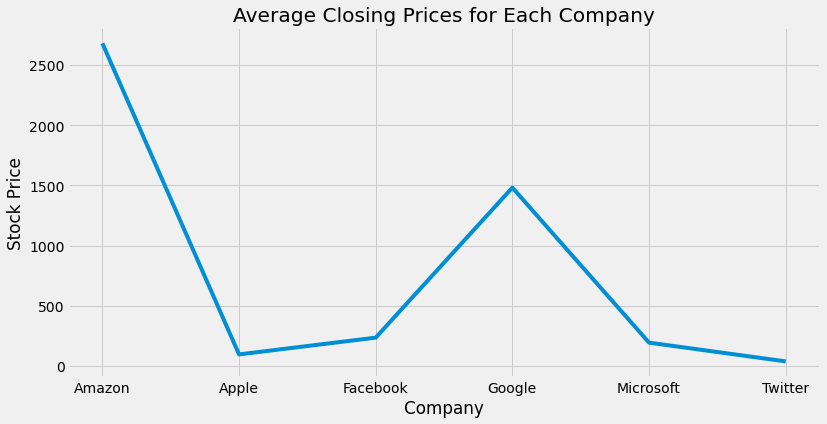

In [9]:
# your code here
plt.style.use('fivethirtyeight')
plt.grid()
avg_plot=merged_df.groupby("Company").Close.mean().plot(figsize=(12,6))
plt.title('Average Closing Prices for Each Company')
plt.ylabel('Stock Price')



** What is the max Close price for each company's stock throughout the time period?**

In [10]:
# your code here
max_AMZN=merged_df[(merged_df.Company=="Amazon")]
print("The max closing price for Amazon is $",round(merged_AMZN.Close.max(),2))

max_FB=merged_df[(merged_df.Company=="Facebook")]
print("The max closing price for Facebook is $",round(merged_FB.Close.max(),2))

max_MSFT=merged_df[(merged_df.Company=="Microsoft")]
print("The max closing price for Microsoft is $",round(merged_MSFT.Close.max(),2))

max_TWTR=merged_df[(merged_df.Company=="Twitter")]
print("The max closing price for Twitter is $",round(merged_TWTR.Close.max(),2))

max_AAPL=merged_df[(merged_df.Company=="Apple")]
print("The max closing price for Apple is $",round(merged_AAPL.Close.max(),2))

max_GOOG=merged_df[(merged_df.Company=="Google")]
print("The max closing price for Google is $",round(merged_GOOG.Close.max(),2))

The max closing price for Amazon is $ 3531.45
The max closing price for Facebook is $ 303.91
The max closing price for Microsoft is $ 231.65
The max closing price for Twitter is $ 55.87
The max closing price for Apple is $ 136.69
The max closing price for Google is $ 1827.99


** Create a new dataframe called returns. This dataframe will contain the returns for each company's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

** We can use pandas pct_change() method on the Close column to create a new dataframe representing this return value. Use .groupby().**

In [11]:
# your code here
returns=pd.DataFrame(merged_df,columns=['Company','Returns'])
returns['Returns']=merged_df.groupby('Company')['Close'].pct_change()
returns

,Company,Returns
Date,,
2020-01-02,Amazon,NaN
2020-01-03,Amazon,-0.012139
2020-01-06,Amazon,0.014886
2020-01-07,Amazon,0.002092
2020-01-08,Amazon,-0.007809
...,...,...
2020-12-24,Twitter,-0.006077
2020-12-28,Twitter,0.008523
2020-12-29,Twitter,-0.001286


** Using this returns DataFrame, figure out on what dates each company stock had the best and worst single day returns. Did anything significant happen that day?**

In [12]:
# your code here
returns1=returns
## Amazon had the best single day return of 0.079295 on 2020-07-20.
## Amazon had the worst single day return of -0.079221 on 2020-03-12.
returns1_AMZN=returns1[(returns1.Company=="Amazon")]
returns1_AMZN_max=returns1_AMZN.Returns.max()
returns1_AMZN_min=returns1_AMZN.Returns.min()

returns1_AMZN.loc[(returns1_AMZN['Returns'] == returns1_AMZN_max)|(returns1_AMZN['Returns'] == returns1_AMZN_min)]

,Company,Returns
Date,,
2020-03-12,Amazon,-0.079221
2020-07-20,Amazon,0.079295


In [13]:
## Apple had the best single day return of 0.119808 on 2020-03-13.
## Apple had the worst single day return of -0.128647 on 2020-03-16.
returns1_AAPL=returns1[(returns1.Company=="Apple")]
returns1_AAPL_max=returns1_AAPL.Returns.max()
returns1_AAPL_min=returns1_AAPL.Returns.min()

returns1_AAPL.loc[(returns1_AAPL['Returns'] == returns1_AAPL_max)|(returns1_AAPL['Returns'] == returns1_AAPL_min)]

,Company,Returns
Date,,
2020-03-13,Apple,0.119808
2020-03-16,Apple,-0.128647


In [14]:
## Facebook had the best single day return of 0.10235 on 2020-03-13.
## Facebook had the worst single day return of -0.14253 on 2020-03-16.
returns1_FB=returns1[(returns1.Company=="Facebook")]
returns1_FB_max=returns1_FB.Returns.max()
returns1_FB_min=returns1_FB.Returns.min()

returns1_FB.loc[(returns1_FB['Returns'] == returns1_FB_max)|(returns1_FB['Returns'] == returns1_FB_min)]

,Company,Returns
Date,,
2020-03-13,Facebook,0.10235
2020-03-16,Facebook,-0.14253


In [15]:
## Google had the best single day return of 0.094017 on 2020-03-13.
## Google had the worst single day return of -0.111008 on 2020-03-16.
returns1_GOOG=returns1[(returns1.Company=="Google")]
returns1_GOOG_max=returns1_GOOG.Returns.max()
returns1_GOOG_min=returns1_GOOG.Returns.min()

returns1_GOOG.loc[(returns1_GOOG['Returns'] == returns1_GOOG_max)|(returns1_GOOG['Returns'] == returns1_GOOG_min)]

,Company,Returns
Date,,
2020-03-13,Google,0.094017
2020-03-16,Google,-0.111008


In [16]:
## Microsoft had the best single day return of 0.142169 on 2020-03-13.
## Microsoft had the worst single day return of -0.147390 on 2020-03-16.
returns1_MSFT=returns1[(returns1.Company=="Microsoft")]
returns1_MSFT_max=returns1_MSFT.Returns.max()
returns1_MSFT_min=returns1_MSFT.Returns.min()

returns1_MSFT.loc[(returns1_MSFT['Returns'] == returns1_MSFT_max)|(returns1_MSFT['Returns'] == returns1_MSFT_min)]

,Company,Returns
Date,,
2020-03-13,Microsoft,0.142169
2020-03-16,Microsoft,-0.147390


In [17]:
## Twitter had the best single day return of 0.150344 on 2020-02-06.
## Twitter had the worst single day return of -0.211139 on 2020-10-30.
returns1_TWTR=returns1[(returns1.Company=="Twitter")]
returns1_TWTR_max=returns1_TWTR.Returns.max()
returns1_TWTR_min=returns1_TWTR.Returns.min()

returns1_TWTR.loc[(returns1_TWTR['Returns'] == returns1_TWTR_max)|(returns1_TWTR['Returns'] == returns1_TWTR_min)]

,Company,Returns
Date,,
2020-02-06,Twitter,0.150344
2020-10-30,Twitter,-0.211139


** Please state here what you have noticed. Did anything significant happen in that time frame? **

**Answ: I noticed that the stock prices were most volatile in March 2020.
WHO declares COVID-19 as a pandemic on March 11.**

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? **

**Answ: Twitter is the riskiest over the entire time period.**

In [18]:
#  your code here
returns1.groupby('Company').Returns.std()

Company
Amazon       0.024260
Apple        0.029423
Facebook     0.028941
Google       0.024150
Microsoft    0.027684
Twitter      0.038996
Name: Returns, dtype: float64

In [19]:
returns1.groupby('Company').Returns.std().idxmax()

'Twitter'

** Which company would you classify as the riskiest for the year 2020? **

**Answ: Apple is the most profitable/riskest company for the year 2020.**

In [20]:
# your code here
## Profitability: Close price change= (end price - beginning price)/beginning price.
profit = [AMZN,AAPL,FB,GOOG,MSFT,TWTR]
x=[]
for i in profit:
    x.append((i.Close[-1]-i.Close[0])/i.Close[0])
y=["Amazon","Apple","Facebook","Google","Microsoft","Twitter"]
Profitability=pd.DataFrame(x,y)
Profitability

,0
Amazon,0.715971
Apple,0.767138
Facebook,0.302126
Google,0.281204
Microsoft,0.384759
Twitter,0.676471


In [21]:
Profitability.idxmax()

0    Apple
dtype: object

** Create a density plot using any library you like to visualize the previous year's return for each company **

In [22]:
# your code here
start_19 = datetime.datetime(2019, 1, 1)
end_19 = datetime.datetime(2019, 12, 31)

AMZN_19 = data.DataReader("AMZN", start=start_19, end=end_19)
AAPL_19 = data.DataReader("AAPL", start=start_19, end=end_19)
FB_19 = data.DataReader("FB", start=start_19, end=end_19)
GOOG_19 = data.DataReader("GOOG", start=start_19, end=end_19)
MSFT_19 = data.DataReader("MSFT", start=start_19, end=end_19)
TWTR_19 = data.DataReader("TWTR", start=start_19, end=end_19)

AMZN_19["Company"]='Amazon'
FB_19["Company"]='Facebook'
MSFT_19["Company"]='Microsoft'
TWTR_19["Company"]='Twitter'
AAPL_19["Company"]='Apple'
GOOG_19["Company"]='Google'

merged_df_19=pd.concat([AMZN_19,AAPL_19,FB_19,GOOG_19,MSFT_19,TWTR_19])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [23]:
AMZN_19['Amazon']=AMZN_19.Close.pct_change()
AAPL_19['Apple']=AAPL_19.Close.pct_change()
FB_19['Facebook']=FB_19.Close.pct_change()
GOOG_19['Google']=GOOG_19.Close.pct_change()
MSFT_19['Microsoft']=MSFT_19.Close.pct_change()
TWTR_19['Twitter']=TWTR_19.Close.pct_change()

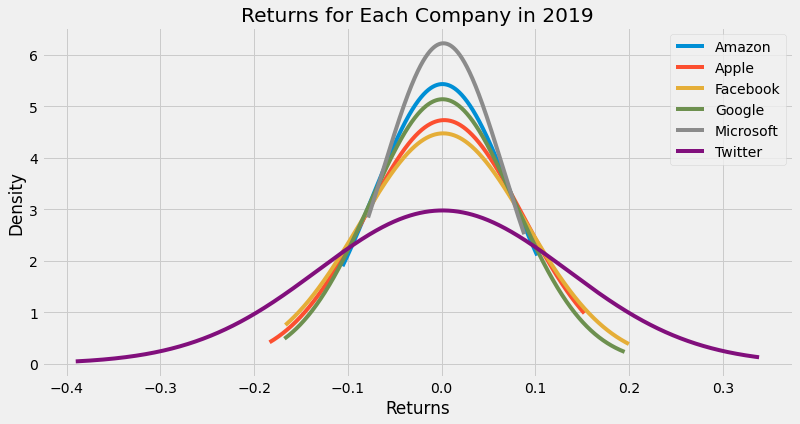

In [24]:
plt.style.use('fivethirtyeight')
AMZN_19['Amazon'].plot.kde(bw_method=5,figsize=(12,6))
AAPL_19['Apple'].plot.kde(bw_method=5)
FB_19['Facebook'].plot.kde(bw_method=5)
GOOG_19['Google'].plot.kde(bw_method=5)
MSFT_19['Microsoft'].plot.kde(bw_method=5)
TWTR_19['Twitter'].plot.kde(bw_method=5)
plt.title('Returns for Each Company in 2019')
plt.xlabel('Returns')
plt.legend()

### Moving Averages

** Please derive the moving averages for these stocks in the year 2020. Use .rolling() in pandas to get the rolling average calculation. ** 



In [25]:
# your code here
## I chose 50 period, because the 50 moving average is the stanard swing-traing moving average
## and very popular. Most traders use it to ride trends
## because it's the ideal compromise between too short and too long term.
merged_df_1=merged_df
merged_df_1['SMA50']= merged_df_1['Close'].rolling(50).mean()
merged_df_1

,High,Low,Open,Close,Volume,Adj Close,Company,SMA50
Date,,,,,,,,
2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000.0,1898.010010,Amazon,NaN
2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400.0,1874.969971,Amazon,NaN
2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800.0,1902.880005,Amazon,NaN
2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900.0,1906.859985,Amazon,NaN
2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000.0,1891.969971,Amazon,NaN
...,...,...,...,...,...,...,...,...
2020-12-24,55.189999,53.860001,54.520000,53.970001,3661100.0,53.970001,Twitter,47.4520
2020-12-28,55.180000,53.930000,55.000000,54.430000,6829600.0,54.430000,Twitter,47.6200
2020-12-29,55.400002,53.549999,54.509998,54.360001,6644800.0,54.360001,Twitter,47.7910


** Plot the rolling 30 day average against the Close Price for Apple's stock for the year 2020**

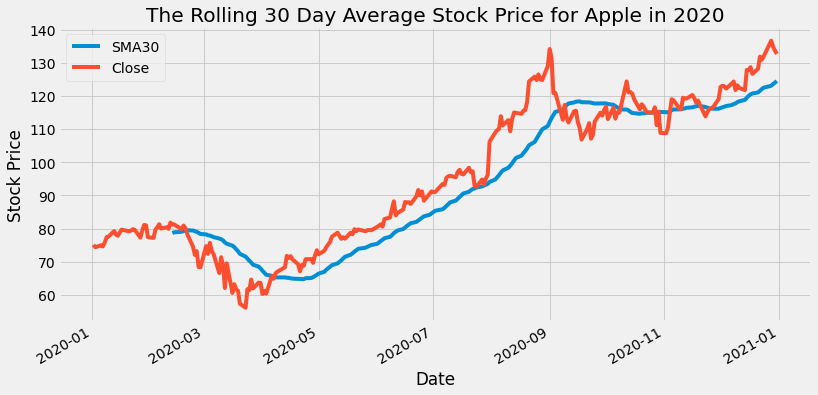

In [26]:
# your code here
AAPL_rolling=AAPL
AAPL_rolling["SMA30"] = AAPL_rolling['Close'].rolling(30).mean()

plt.style.use('fivethirtyeight')
plt.grid()
AAPL_rolling["SMA30"].plot(figsize=(12,6)) 
AAPL_rolling["Close"].plot() 
plt.title('The Rolling 30 Day Average Stock Price for Apple in 2020')
plt.ylabel('Stock Price')
plt.legend()


** Create a heatmap of the correlation between the stocks Close Price.**


In [27]:
# your code here
merged_df_corr = merged_df[['Close','Company']]
merged_df_corr=merged_df_corr.reset_index()
merged_df_corr_pivot=merged_df_corr.pivot('Date','Company','Close').reset_index()
merged_df_corr_pivot
corr_df = merged_df_corr_pivot.corr(method='pearson')
corr_df.reset_index()
corr_df

Company,Amazon,Apple,Facebook,Google,Microsoft,Twitter
Company,,,,,,
Amazon,1.000000,0.920808,0.890986,0.744437,0.962087,0.738880
Apple,0.920808,1.000000,0.949011,0.867947,0.930717,0.891230
Facebook,0.890986,0.949011,1.000000,0.906255,0.928479,0.842421
Google,0.744437,0.867947,0.906255,1.000000,0.842274,0.857050
Microsoft,0.962087,0.930717,0.928479,0.842274,1.000000,0.790271
Twitter,0.738880,0.891230,0.842421,0.857050,0.790271,1.000000


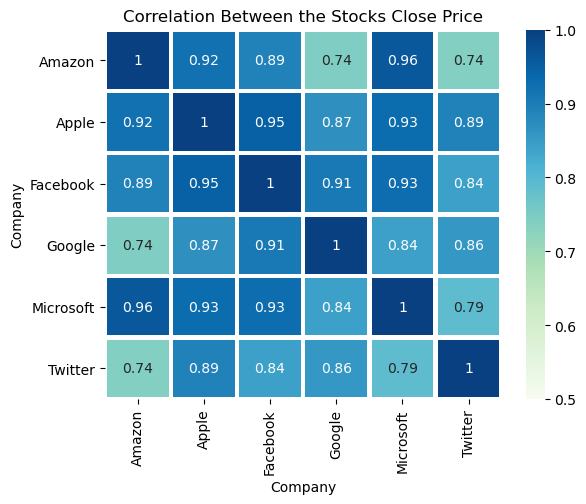

In [28]:
corr_heatmap = np.zeros_like(corr_df)
corr_heatmap[np.triu_indices_from(corr_heatmap)] = True
#generate plot
import seaborn as sns
plt.style.use('default')
sns.heatmap(corr_df, cmap='GnBu', vmax=1.0, vmin=0.5, linewidths=2.5,annot=True)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.title('Correlation Between the Stocks Close Price')
plt.show()

# Part 2. 

Please generate some visualization and analyze some stocks in other industries (you can pick a couple). For instancd, you may analyze how stocks have been doing this year in the airline industry, retail industry, service industry and so forth. Feel free to use any plotting packages (in Python), and generate any types of figures. You may also comment on the generated figures, and explain any insights you have obtained. If you have some background knowlege in financial services, please feel free to apply them.

In [29]:
# your code here
## I chose the data from Ford, GM, and Tesla in car industry.
start_car = datetime.datetime(2020,1,1)
end_car = datetime.datetime(2020,12,31)

Ford = data.DataReader("F", start=start_car, end=end_car)
General_Motors = data.DataReader("GM", start=start_car, end=end_car)
Tesla = data.DataReader("TSLA", start=start_car, end=end_car)

Ford["Company"]='Ford'
General_Motors["Company"]='General_Motors'
Tesla["Company"]='Tesla'

combined_car=pd.concat([Ford,General_Motors,Tesla])
combined_car

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2020-01-02,9.290000,9.420000,9.190000,9.420000,9.262475,43425700,Ford
2020-01-03,9.310000,9.370000,9.150000,9.210000,9.055987,45040800,Ford
2020-01-06,9.100000,9.170000,9.060000,9.160000,9.006823,43372300,Ford
2020-01-07,9.200000,9.250000,9.120000,9.250000,9.095318,44984100,Ford
2020-01-08,9.230000,9.300000,9.170000,9.250000,9.095318,45994900,Ford
...,...,...,...,...,...,...,...
2020-12-23,632.200012,651.500000,622.570007,645.979980,645.979980,33173000,Tesla
2020-12-24,642.989990,666.090027,641.000000,661.770020,661.770020,22865600,Tesla
2020-12-28,674.510010,681.400024,660.799988,663.690002,663.690002,32278600,Tesla


**VISUALIZATION 1: Scatter matrics determine the linear correaltion between the three variables. The open prices of GM and Ford are positive correlation. When GM tends to increase its open price as the Ford's open price increases. Unlike the case with Tesla, it seems to be scattered randomly, so there is no correlation.**

array([[<AxesSubplot:xlabel='Ford Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='General_Motors Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Tesla Open', ylabel='Ford Open'>],
       [<AxesSubplot:xlabel='Ford Open', ylabel='General_Motors Open'>,
        <AxesSubplot:xlabel='General_Motors Open', ylabel='General_Motors Open'>,
        <AxesSubplot:xlabel='Tesla Open', ylabel='General_Motors Open'>],
       [<AxesSubplot:xlabel='Ford Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='General_Motors Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Tesla Open', ylabel='Tesla Open'>]],
      dtype=object)

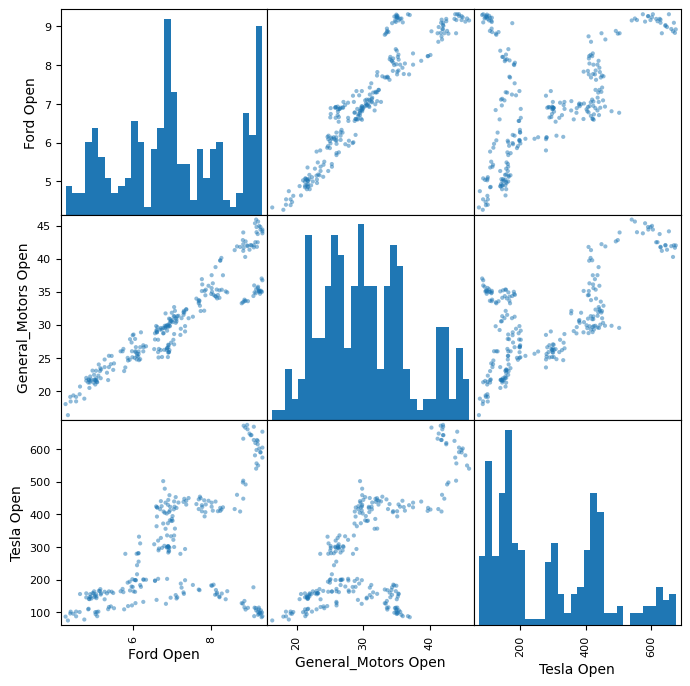

In [30]:
car_open = pd.concat([Ford['Open'],General_Motors['Open'],Tesla['Open']],axis=1)
car_open.columns=['Ford Open','General_Motors Open','Tesla Open']
from pandas.plotting import scatter_matrix
scatter_matrix(car_open,figsize=(8,8),hist_kwds={'bins':30})

**VISUALIZATION 2: Kernel density plot normalizes data. I used the daily percentage change of stock price to measure their volitalities. It shows that Tesla is indeed fatter. Ford and GM are as stable as each other. As you can see the width of the bell shape are almost the same. We can also use box plots to show the dispersion of the data set more visible.**

In [31]:
Ford['Returns']=Ford.Close.pct_change()
General_Motors['Returns']=General_Motors.Close.pct_change()
Tesla['Returns']=Tesla.Close.pct_change()

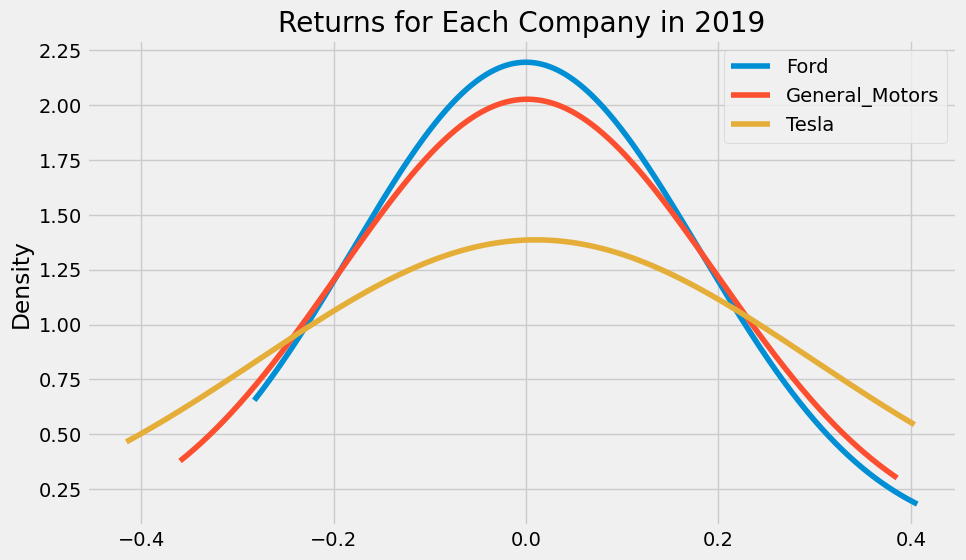

In [33]:
plt.style.use('fivethirtyeight')
Ford.Returns.plot(kind='kde',label='Ford',bw_method=5,figsize=(10,6))
General_Motors.Returns.plot(kind='kde',label='General_Motors',bw_method=5)
Tesla.Returns.plot(kind='kde',label='Tesla',bw_method=5)
plt.title('Returns for Each Company in 2019')
plt.legend()

**VISUALIZATION 3: Box plots indicate that Tesla is way more spread out and volatile than Ford and GM. It has more outliers. That means buying Tesla's stock is more risky but also has greater probility of higher return.**

<AxesSubplot:>

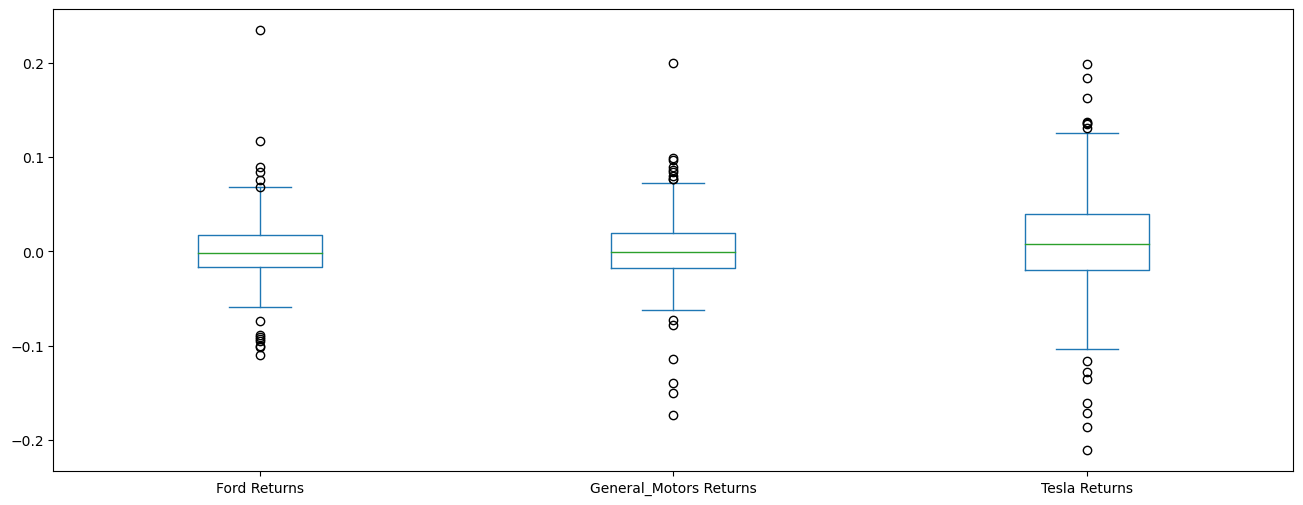

In [34]:
plt.style.use('default')
box_car = pd.concat([Ford['Returns'],General_Motors['Returns'],Tesla['Returns']],axis=1)
box_car.columns=['Ford Returns','General_Motors Returns','Tesla Returns']
box_car.plot(kind='box',figsize=(16,6))

**VISUALIZATION 4: I'd like to find which company has the highest market capitalization, so I calculated the total number of traded stock for each companies. The graph shows that Tesla has the highest total market value of all outstanding shares. I also did some reseach on its spike - the position of the maximum stock volume. It happend on 2020-12-18. Tesla jumps in heavy volume ahead of S&P 500 entry and then falls a bit in after hours.**

In [35]:
Ford['Total Traded']=Ford['Open']*Ford['Volume']
General_Motors['Total Traded']=General_Motors['Open']*General_Motors['Volume']
Tesla['Total Traded']=Tesla['Open']*Tesla['Volume']

Text(0, 0.5, 'Total Trade')

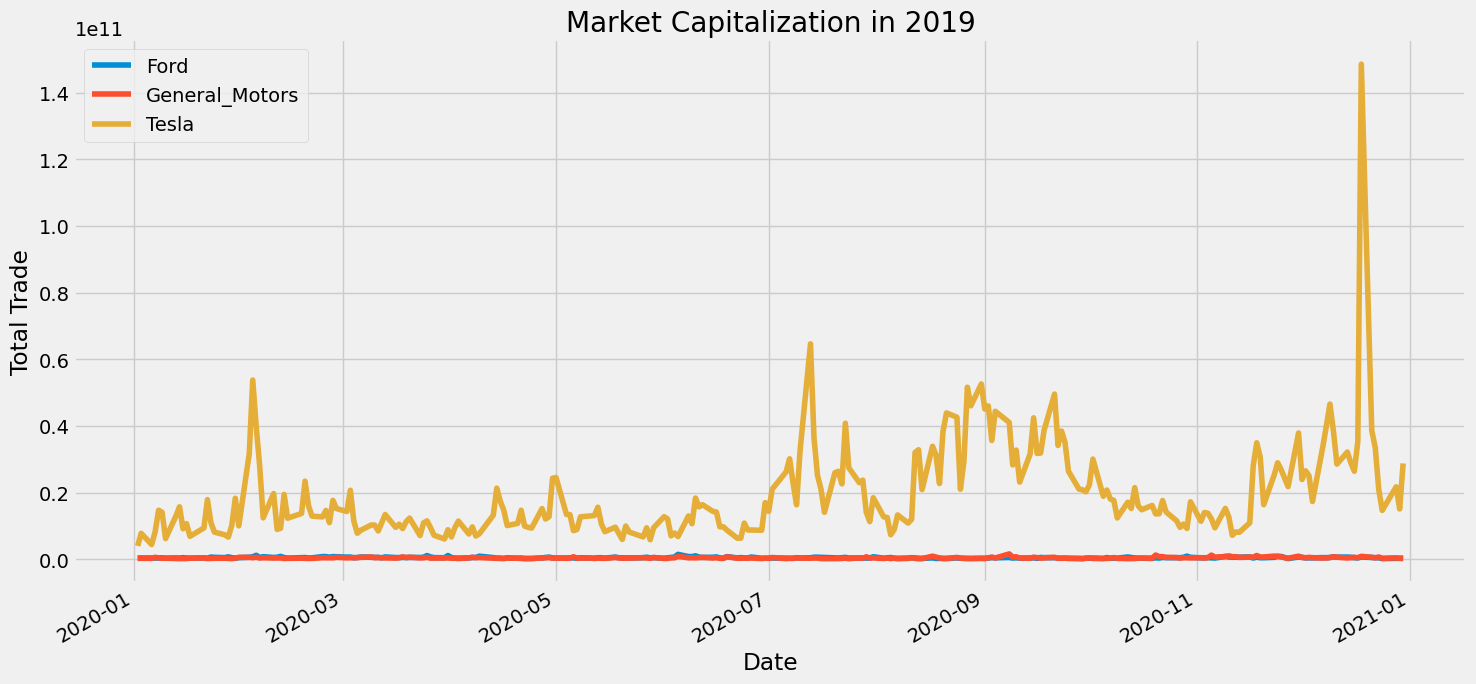

In [36]:
plt.style.use('fivethirtyeight')
Ford['Total Traded'].plot(label='Ford',figsize=(16,8))
General_Motors['Total Traded'].plot(label='General_Motors',figsize=(16,8))
Tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
plt.title('Market Capitalization in 2019')
plt.legend()
plt.ylabel('Total Trade')

In [37]:
Tesla.iloc[Tesla['Total Traded'].argmax()]

Open                    668.900024
High                         695.0
Low                     628.539978
Close                        695.0
Adj Close                    695.0
Volume                   222126200
Company                      Tesla
Returns                   0.059613
Total Traded    148580220603.00293
Name: 2020-12-18 00:00:00, dtype: object